# Load The Data

In [1]:
# Data handling
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#Training The Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.experimental import enable_iterative_imputer  # must be imported before
from sklearn.impute import IterativeImputer


# Loading Data
from pathlib import Path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic_train = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test = pd.read_csv("/kaggle/input/titanic/test.csv")

# Explore and Visualize The Data

In [3]:
titanic_train.shape

(891, 12)

In [4]:
titanic_test.shape

(418, 11)

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_train["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [9]:
titanic_train["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [10]:
titanic_train["Age"].value_counts().sort_index()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [11]:
titanic_train["Age"].value_counts().sort_values()

Age
74.00     1
34.50     1
0.42      1
0.67      1
66.00     1
         ..
28.00    25
19.00    25
18.00    26
22.00    27
24.00    30
Name: count, Length: 88, dtype: int64

In [12]:
titanic_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


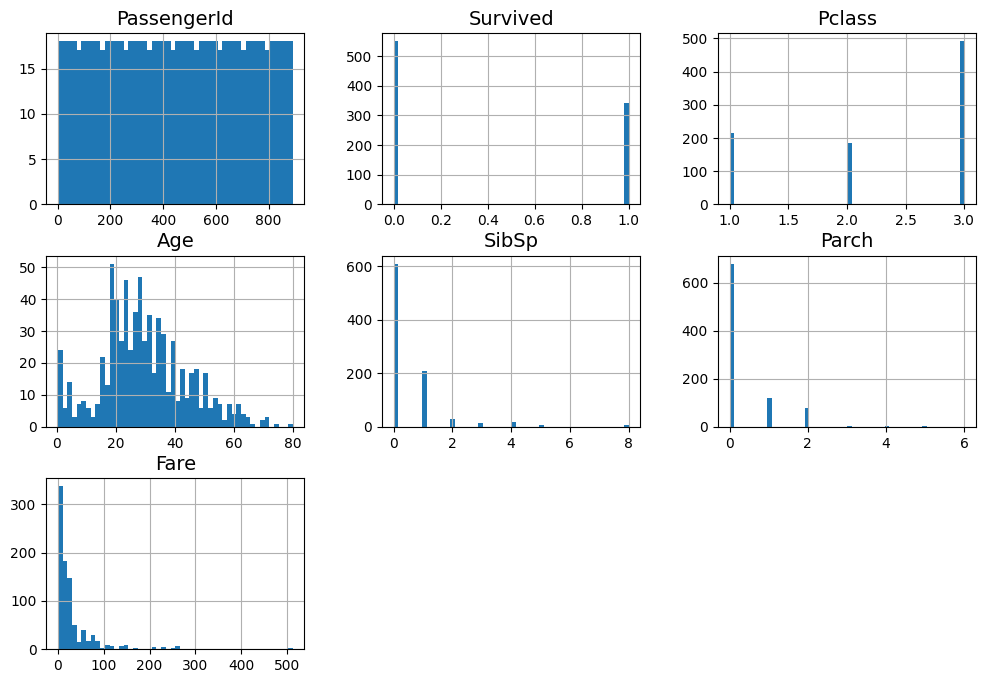

In [14]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

titanic_train.hist(bins = 50 , figsize=(12,8))

plt.show()

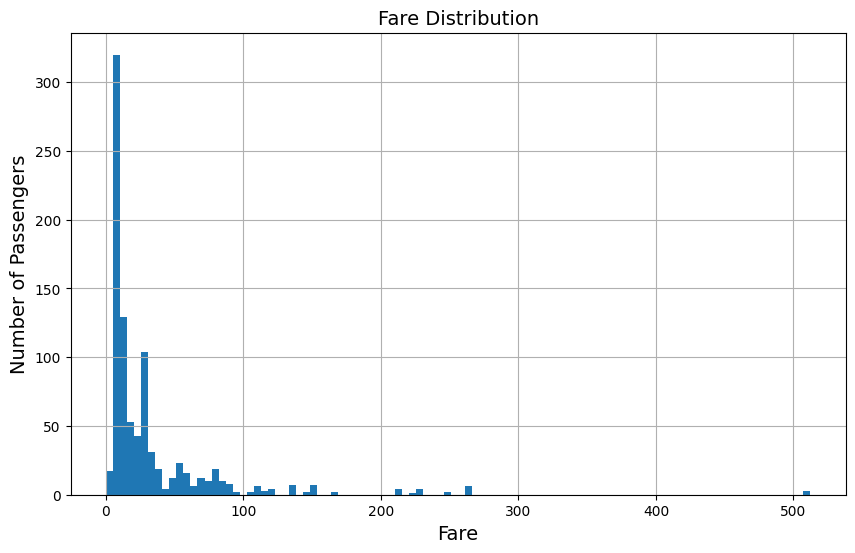

In [15]:
titanic_train["Fare"].hist(bins=100, figsize=(10,6))
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Fare Distribution")
plt.show()

In [16]:
corr_matrix = titanic_train.corr(numeric_only = True)
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [17]:
corr_matrix["Fare"].sort_values(ascending = False)

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='Survived'>

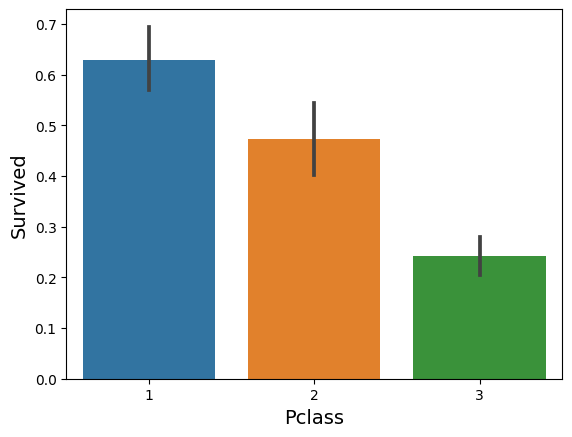

In [18]:
sns.barplot(x="Pclass", y="Survived", data=titanic_train)

# Feature Engineering

In [19]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df  = pd.read_csv("/kaggle/input/titanic/test.csv")

In [20]:
train_df.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
# ------------------------------
# Feature Engineering (shared)
# ------------------------------
def feature_engineering(df):
    df = df.copy()

    # family Size 
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

    # Fare per person
    df["FarePerPerson"] = df["Fare"] / df["FamilySize"]

    # Cabin Known
    df["CabinKnown"] = df["Cabin"].notnull().astype(int)

     # Extract Title
    df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)
    df["Title"] = df["Title"].replace(
        ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev',
         'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df["Title"] = df["Title"].replace(['Mlle', 'Ms'], 'Miss')
    df["Title"] = df["Title"].replace('Mme', 'Mrs')

     # Log-transform skewed features
    df["LogFare"] = np.log1p(df["Fare"])
    df["LogAge"] = np.log1p(df["Age"])

    return df

train_df = feature_engineering(train_df)
test_df  = feature_engineering(test_df)

# Target & Features
X = train_df.drop(["Survived", "PassengerId", "Name", "Ticket", "Cabin"], axis=1)
y = train_df["Survived"]
X_test_final = test_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FarePerPerson,CabinKnown,Title,LogFare,LogAge
0,3,male,22.0,1,0,7.2500,S,2,3.62500,0,Mr,2.110213,3.135494
1,1,female,38.0,1,0,71.2833,C,2,35.64165,1,Mrs,4.280593,3.663562
2,3,female,26.0,0,0,7.9250,S,1,7.92500,0,Miss,2.188856,3.295837
3,1,female,35.0,1,0,53.1000,S,2,26.55000,1,Mrs,3.990834,3.583519
4,3,male,35.0,0,0,8.0500,S,1,8.05000,0,Mr,2.202765,3.583519


# Pipeline Setup

In [23]:
# Numerical columns
num_cols = X.select_dtypes(include=[np.number]).columns

# Categorical columns
cat_cols = [c for c in X.columns if c not in num_cols]

In [24]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ]
)

In [25]:
# Final Pipeline with Model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200, max_depth=7, random_state=42
    ))
])

# Training & Validation

In [26]:
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-validation Accuracy:", scores.mean())

Cross-validation Accuracy: 0.8316238779737619


# Fine Tuning By RandomizedSearch

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Parameter distributions for Random Forest
param_dist = {
    "classifier__n_estimators": randint(100, 500),
    "classifier__max_depth": randint(3, 15),
    "classifier__min_samples_split": randint(2, 10),
    "classifier__min_samples_leaf": randint(1, 10),
    "classifier__max_features": ["sqrt", "log2", None]
}

# Randomized Search
random_search = RandomizedSearchCV(
    model,  #  pipeline is called model
    param_distributions=param_dist,
    n_iter=50,
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Evaluate on validation/test set
best_model = random_search.best_estimator_

Best Params: {'classifier__max_depth': 12, 'classifier__max_features': None, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 154}
Best CV Score: 0.8462431736865232


In [28]:
predictions = best_model.predict(X_test_final)

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'FamilySize'}>],
       [<Axes: title={'center': 'FarePerPerson'}>,
        <Axes: title={'center': 'CabinKnown'}>,
        <Axes: title={'center': 'LogFare'}>],
       [<Axes: title={'center': 'LogAge'}>, <Axes: >, <Axes: >]],
      dtype=object)

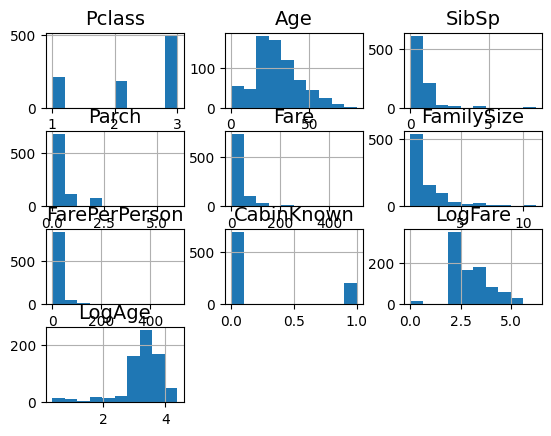

In [29]:
X.hist()

# Submission

In [30]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})

In [31]:
submission.to_csv("submission.csv", index=False)